<a href="https://colab.research.google.com/github/Sanu3286/The-Spark-Foundation-Tasks/blob/main/Task2_Optimal_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TFS TASK 2

##Author: MOH KHALID

##Poblem Statemenet: 
######From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

use the features and create cluster of species mean we have to classify species in different optimal group of similar type.
## Dataset:  https://bit.ly/3kXTdox

This dataset have 6	column 
1. Id

2. SepalLengthCm	

3. SepalWidthCm	

4. PetalLengthCm 

5. PetalWidthCm 

6. Species 

showing lenght and width as independent variable and species as dependent variable.
## Methodology
  1. Silhouette method
  2. Elbow method
  3. The gap statistics
  4. The sum of squared 
  5. Dendogram                                                 
                                                                                         
Here we use two very famous method named elbow method and silhouette method.                                                                     We divide our task in 5 step 

step 1: Importning libreries and reading the dataset

step 2: EDA

step 3: Silhouette Method for optimal number of clusters

step 4: Elbow method for optimal number of clusters

step 5: ploting clusters



#### Step 1 : Importning libreries and reading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       ### S(i)=b(i)-a(i)/max(a(i),b(i))
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score



In [ ]:
from google.colab import files
uploaded = files.upload()
import io


Saving Iris.csv to Iris (9).csv


In [ ]:
data=pd.read_csv('/content/Iris.csv')


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### Step 2: EDA

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.info()
##species is an object type all other are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
import seaborn as sns

In [ ]:
duplicate_values=data.duplicated(subset=None, keep='first').sum()
print(duplicate_values)

##sns.pairplot(data=da)
##we can see that there is no trend but data is distributed in clustered manner

0


In [ ]:
data.drop(['Species'],axis=1,inplace=True)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


####                          Step 3: Silhouette Method for optimal number of clusters

In [ ]:
## store values for creating cluster  
x = data.iloc[:, [0, 1, 2, 3]].values

In [ ]:



# Instantiate the KMeans models

km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model

km.fit_predict(x)

# Calculate Silhoutte Score

score = silhouette_score(x, km.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.582


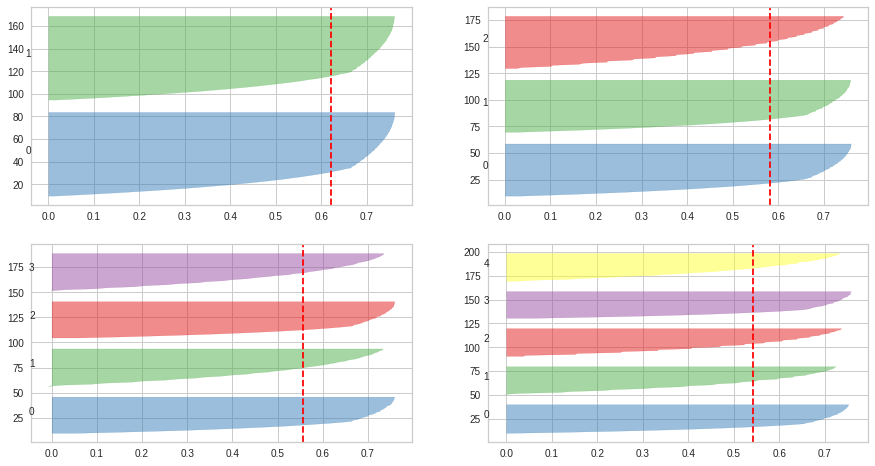

In [ ]:


fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

#### Step 4: Elbow method for optimal number of clusters

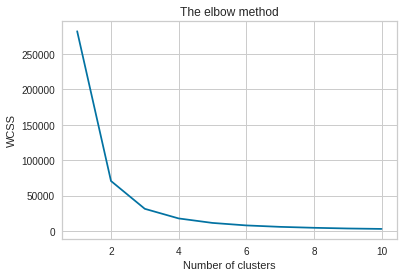

In [ ]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
w = []
k=1

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    w.append(kmeans.inertia_)
    
    
# ploting elbow curve
plt.plot(range(1, 11), w)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()



###### In  above elbow curve we can see there is a sharp or sudden change at cluster number 2 and 3 . But we have to choose maximum value of cluster where sharp change occur so 3 is optimal number of cluster

#### Step 5 ploting clusters

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

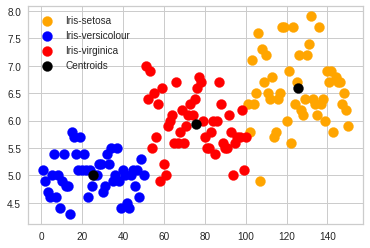

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Black', label = 'Centroids')

plt.legend()

##### Concluussion:
1. Both  silhouette and elbow method gives optimal number of cluster as 3 
2. In silhouettte score method there is abmiguity for 2 and 3 cluster number so we use elbow method
